In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/b1cc93bf8bb4140ace71e0a3e44b8dcb/raw/17b5ac23c86baed88baf2c01b49d4913963f7cf2/data.csv')

In [3]:
df.head()

,web_browser,water_ml,coffee_ml,pet,favorite_color
0,Edge,1460.908387,1215.178520,dog,beige
1,Firefox,1518.863237,1401.531823,cat,navy
2,Edge,1219.323161,1726.410266,hamster,bisque
3,Opera,1068.023818,2860.242041,hamster,midnightblue
4,Safari,890.031813,933.430086,hamster,gainsboro


In [16]:
round(df['water_ml'].mean(), 3)

1499.024

Is average water or coffee consumption higher for Chrome users?


In [8]:
chrome_usrs = df[df.web_browser == 'Chrome']
chrome_usrs.head()

,web_browser,water_ml,coffee_ml,pet,favorite_color
9,Chrome,1502.497325,0.000000,dog,indigo
12,Chrome,1414.014089,0.000000,dog,antiquewhite
13,Chrome,1777.643236,2145.870396,cat,mediumorchid
17,Chrome,1312.431939,2080.193718,hamster,pink
18,Chrome,1583.171690,2054.713880,hamster,darkslategray


In [9]:
# Chrome users water mean
chrome_usrs.water_ml.mean()

1500.7287591975637

In [17]:
# Chrome users coffee mean
chrome_usrs.coffee_ml.mean()

1609.3810638355658

Based on this dataset, which web browser has the least number of users?


In [14]:
# Least users counts
df.web_browser.value_counts().sort_values()

Chrome     12973
Firefox    12988
Opera      13098
Safari     13237
Edge       13429
Name: web_browser, dtype: int64

In [15]:
df.web_browser.min()

'Chrome'

Which web browser has the largest proportion of people with no coffee consumption?

In [23]:
non_coffee_drinkers_df = df[df.coffee_ml == 0.00]
non_coffee_drinkers_df

,web_browser,water_ml,coffee_ml,pet,favorite_color
5,Edge,1956.553906,0.0,NaN,magenta
7,Opera,1388.887964,0.0,dog,seashell
9,Chrome,1502.497325,0.0,dog,indigo
12,Chrome,1414.014089,0.0,dog,antiquewhite
16,Firefox,1504.984810,0.0,dog,darkseagreen
...,...,...,...,...,...
65717,Safari,1712.945313,0.0,NaN,tan
65718,Opera,1955.096516,0.0,dog,indigo
65719,Safari,1313.608584,0.0,dog,oldlace
65720,Chrome,1697.715200,0.0,dog,green


In [33]:
non_coffee_drinkers_df.groupby('web_browser').coffee_ml.count().sort_values()

web_browser
Chrome     2536
Opera      2571
Safari     2616
Edge       2629
Firefox    2630
Name: coffee_ml, dtype: int64

In [34]:
non_coffee_drinkers_df.groupby('web_browser').coffee_ml.count().max()

2630

How many people have a coffee consumption less than 1000 and do not have a pet?

In [46]:
df[(df.coffee_ml < 1000) & ((df.pet == 'NaN') | (df.pet == 'nan'))]

,web_browser,water_ml,coffee_ml,pet,favorite_color


In [42]:
df.coffee_ml.unique()

array([1215.17852049, 1401.53182315, 1726.41026551, ...,  827.05807525,
       1946.12859041, 2073.72618779])

In [44]:
df.pet.unique()

array(['dog', 'cat', 'hamster', nan], dtype=object)

What is the most common favorite color for people that have a hamster as a pet?

In [49]:
df[df.pet == 'hamster'].favorite_color.value_counts().sort_values()

indianred        67
antiquewhite     69
peachpuff        69
goldenrod        73
darkcyan         74
               ... 
bisque          106
gainsboro       107
violet          109
green           110
orchid          111
Name: favorite_color, Length: 148, dtype: int64

Is the median coffee consumption higher for people who's favorite color is crimson, pink, or lavender?`

In [50]:
df.favorite_color.unique()

array(['beige', 'navy', 'bisque', 'midnightblue', 'gainsboro', 'magenta',
       'steelblue', 'seashell', 'lightseagreen', 'indigo', 'aqua',
       'oldlace', 'antiquewhite', 'mediumorchid', 'cornflowerblue',
       'lime', 'darkseagreen', 'pink', 'darkslategray', 'mediumblue',
       'orchid', 'floralwhite', 'forestgreen', 'orange', 'darkkhaki',
       'honeydew', 'mediumturquoise', 'darkviolet', 'wheat', 'rosybrown',
       'yellowgreen', 'ivory', 'slategrey', 'dimgrey', 'indianred',
       'mintcream', 'firebrick', 'coral', 'azure', 'lightgray',
       'cadetblue', 'lightcoral', 'mediumvioletred', 'yellow', 'teal',
       'darkgrey', 'whitesmoke', 'brown', 'mediumspringgreen',
       'greenyellow', 'lightblue', 'darkslategrey', 'darkgoldenrod',
       'limegreen', 'plum', 'blanchedalmond', 'darkolivegreen',
       'chocolate', 'turquoise', 'thistle', 'lightyellow', 'silver',
       'darkgray', 'ghostwhite', 'dodgerblue', 'darksalmon', 'white',
       'violet', 'darkturquoise', 'mocc

In [51]:
fav_color_crimson = df[df.favorite_color == 'crimson']
fav_color_pink = df[df.favorite_color == 'pink']
fav_color_lavender = df[df.favorite_color == 'lavender']

In [52]:
# Crimson mean coffee consumption
fav_color_crimson.coffee_ml.median()



1438.9847194920067

In [55]:
# Pink mean coffee consumption

fav_color_pink.coffee_ml.median()


1494.2606149535568

In [54]:
# Lavender mean coffee consumption
fav_color_lavender.coffee_ml.median()


1468.7936182905446

Using the IQR method with a k of 1.5 to detect outliers, how many outliers are present in coffee consumption?


<AxesSubplot:>

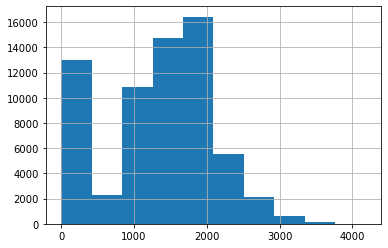

In [99]:
df.coffee_ml.hist()

In [104]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

df.head()


,web_browser,water_ml,coffee_ml,pet,favorite_color,water_ml_outliers,coffee_ml_outliers,water_ml_outliers_outliers,coffee_ml_outliers_outliers
0,Edge,1460.908387,1215.178520,dog,beige,0.0,0.0,0.0,0.0
1,Firefox,1518.863237,1401.531823,cat,navy,0.0,0.0,0.0,0.0
2,Edge,1219.323161,1726.410266,hamster,bisque,0.0,0.0,0.0,0.0
3,Opera,1068.023818,2860.242041,hamster,midnightblue,0.0,0.0,0.0,0.0
4,Safari,890.031813,933.430086,hamster,gainsboro,0.0,0.0,0.0,0.0


In [106]:
outlier_cols = [col for col in df if col.endswith('coffee_ml_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())


~~~
coffee_ml_outliers
count     74.000000
mean     174.353769
std      151.835612
min        9.675911
25%       67.900349
50%      140.208496
75%      249.873184
max      712.178663
Name: coffee_ml_outliers, dtype: float64


Find the combination of pet, favorite color, and web browser that has the smallest average water consumption. What is this group's average coffee consumption?

In [78]:
# Water min
pet_color_browser = df.groupby(['pet', 'web_browser','favorite_color'])
pet_color_browser.water_ml.mean().sort_values()

pet      web_browser  favorite_color
dog      Chrome       lightgray         1293.164463
hamster  Safari       aquamarine        1326.924167
         Opera        paleturquoise     1330.873221
         Safari       yellowgreen       1334.004825
                      darkred           1341.453844
                                           ...     
         Firefox      mediumblue        1663.808929
         Edge         lightblue         1671.637242
                      deeppink          1674.619367
cat      Opera        gray              1676.644435
hamster  Firefox      coral             1687.345656
Name: water_ml, Length: 2220, dtype: float64

In [92]:
# Cofee mean 
pet_color_browser_water = df.groupby(['pet', 'web_browser','favorite_color']).water_ml.mean().sort_values()
pet_color_browser_water

pet      web_browser  favorite_color
dog      Chrome       lightgray         1293.164463
hamster  Safari       aquamarine        1326.924167
         Opera        paleturquoise     1330.873221
         Safari       yellowgreen       1334.004825
                      darkred           1341.453844
                                           ...     
         Firefox      mediumblue        1663.808929
         Edge         lightblue         1671.637242
                      deeppink          1674.619367
cat      Opera        gray              1676.644435
hamster  Firefox      coral             1687.345656
Name: water_ml, Length: 2220, dtype: float64

In [97]:
dog_chrome_lightgray_df = df[(df.pet == 'dog') & (df.web_browser == 'Chrome') & (df.favorite_color == 'lightgray')]
round(dog_chrome_lightgray_df.coffee_ml.mean(), 3)

1663.33

In [56]:
df.head()

,web_browser,water_ml,coffee_ml,pet,favorite_color
0,Edge,1460.908387,1215.178520,dog,beige
1,Firefox,1518.863237,1401.531823,cat,navy
2,Edge,1219.323161,1726.410266,hamster,bisque
3,Opera,1068.023818,2860.242041,hamster,midnightblue
4,Safari,890.031813,933.430086,hamster,gainsboro


Write the code necessary to visualize the average coffee consumption by web browser used.


<AxesSubplot:>

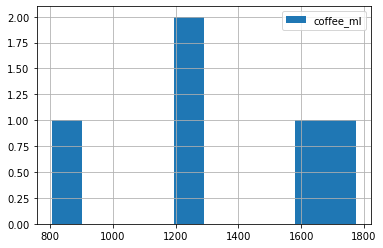

In [110]:
df.groupby(['web_browser']).coffee_ml.mean().hist(legend = True)

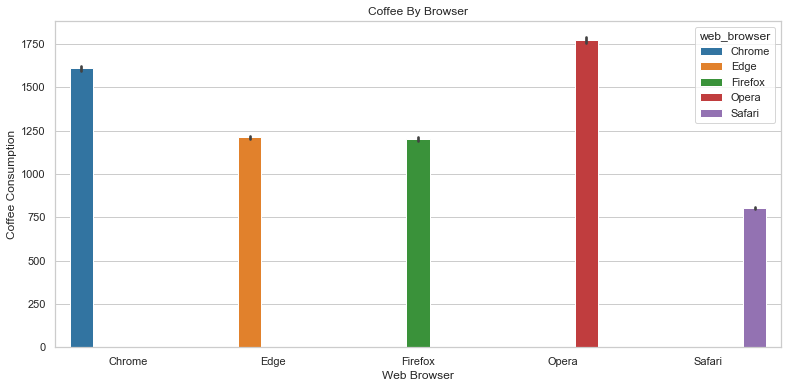

In [131]:
# Coffee by Browser
plt.figure(figsize = (13,6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale = 1)
sns.barplot(x="web_browser", y="coffee_ml", hue="web_browser", data = df.sort_values(['web_browser', 'coffee_ml']))
plt.xlabel("Web Browser")
plt.ylabel("Coffee Consumption")
plt.title("Coffee By Browser")
plt.show()